In [86]:
# Importing Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing Libs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE


# Modelling Libs
from sklearn.tree import DecisionTreeClassifier

# Validating/Testing libs
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score

Load and Inspect Data

In [87]:
file_path = r"E:\Projects\FLM\credit-card-fraud-detection\data\raw\creditcard.csv"

# Read the dataset 
credit_df = pd.read_csv(file_path)

# Display dataset
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
# Printing first ten rows
credit_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
# inspecting the data types of the attributes
credit_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [43]:
# Some Information
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [89]:
# descriptive statistics
credit_df.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data Cleaning

In [12]:
# Handling missing values.
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# Handling missing values.
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [45]:
# Handling duplicate Values

# finding if any duplicates
print(credit_df.duplicated().value_counts())

# Analysing duplicates
duplicate_rows = credit_df[credit_df.duplicated(keep=False)]
duplicate_rows

False    283726
True       1081
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [16]:
# drop the duplicates
credit_df.drop_duplicates(inplace=True)

# verifying
credit_df.duplicated().sum()

np.int64(0)

In [17]:
# Dealing Outliers

#  No need of working outliers because the V1-V28 are already transformed.

In [18]:
# Since V1-V28 all the columns are already transformed and are numerical columns, no need to work on conversion step

Exploratory Data Analysis (EDA)

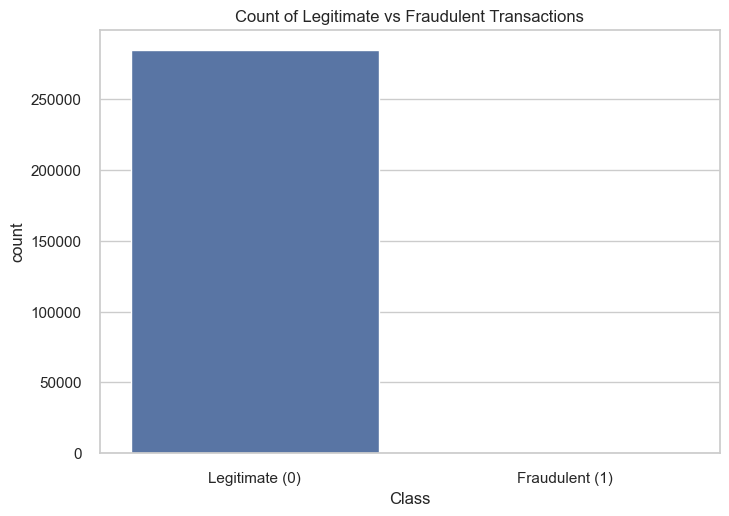

In [88]:
# Count Plot of Fraudulent vs Non-Fraudulent Transactions

sns.countplot(x='Class', data=credit_df)
plt.title('Count of Legitimate vs Fraudulent Transactions')
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])
plt.show()

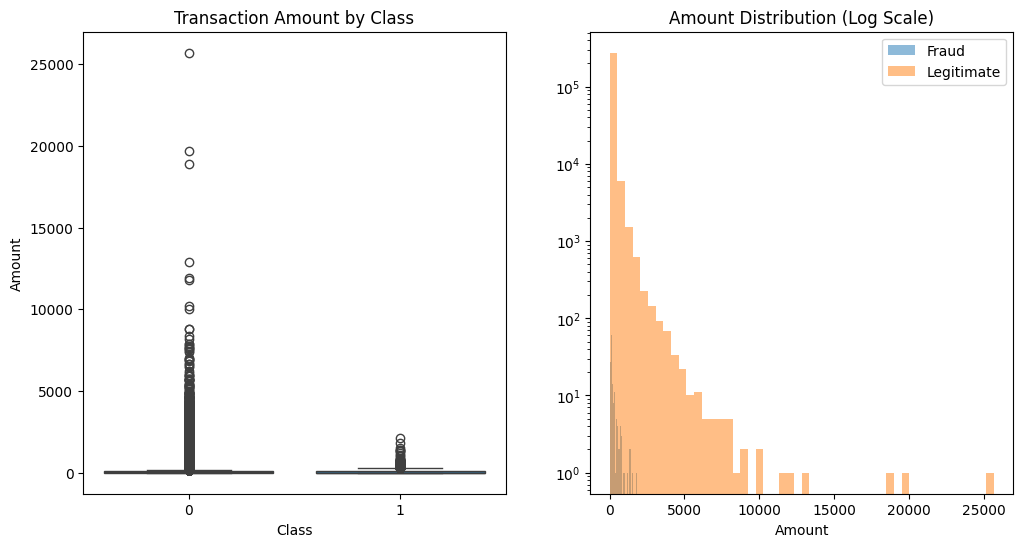

In [20]:
#Transcation Analysis.


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title('Transaction Amount by Class')


plt.subplot(1, 2, 2)
fraud_amounts = credit_df[credit_df['Class'] == 1]['Amount']
legit_amounts = credit_df[credit_df['Class'] == 0]['Amount']
plt.hist(fraud_amounts, bins=50, alpha=0.5, label='Fraud')
plt.hist(legit_amounts, bins=50, alpha=0.5, label='Legitimate')
plt.xlabel('Amount')
plt.yscale('log')
plt.title('Amount Distribution (Log Scale)')
plt.legend()
plt.show()


C:\Users\monik\AppData\Local\Temp\ipykernel_43540\1589891296.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='Amount', data=credit_df, palette=['#3498db', '#e74c3c'], inner=None, alpha=0.3)
C:\Users\monik\AppData\Local\Temp\ipykernel_43540\1589891296.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=credit_df, palette=['#2980b9', '#c0392b'], width=0.3)


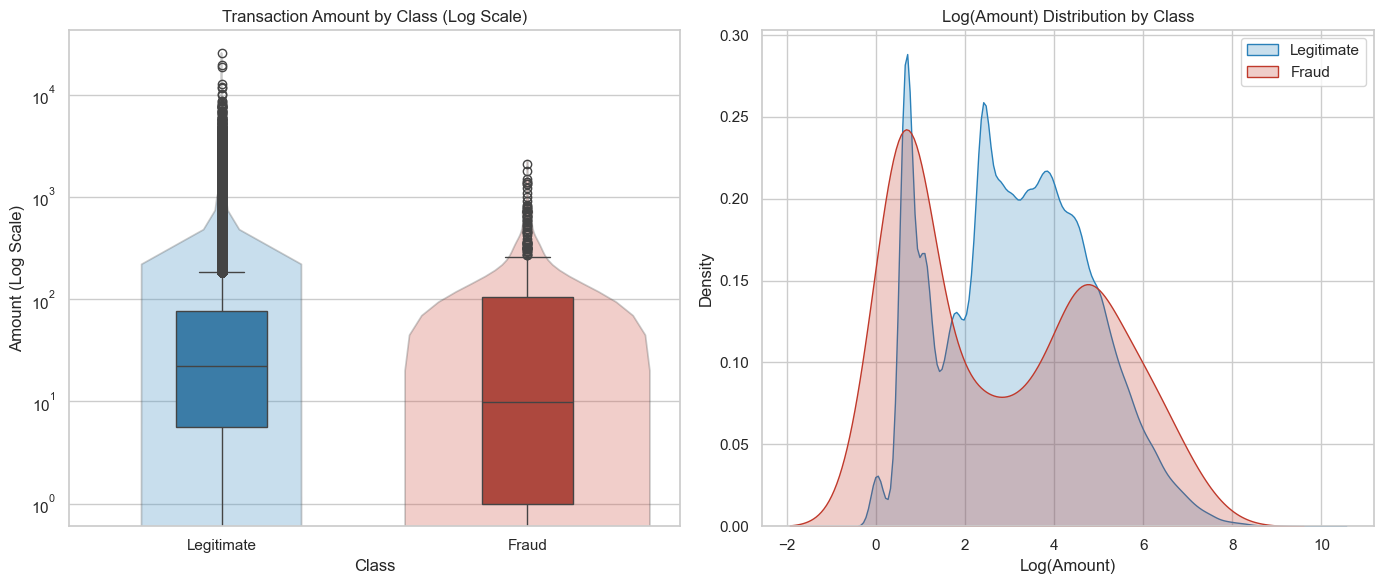

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional: Apply a clean seaborn style
sns.set(style='whitegrid')

# Create a new column for log-transformed amounts (add +1 to avoid log(0))
credit_df['LogAmount'] = np.log1p(credit_df['Amount'])

# Set up the plot area
plt.figure(figsize=(14, 6))

# Plot 1: Boxplot + Violin plot
plt.subplot(1, 2, 1)
sns.violinplot(x='Class', y='Amount', data=credit_df, palette=['#3498db', '#e74c3c'], inner=None, alpha=0.3)
sns.boxplot(x='Class', y='Amount', data=credit_df, palette=['#2980b9', '#c0392b'], width=0.3)
plt.yscale('log')
plt.title('Transaction Amount by Class (Log Scale)')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.ylabel('Amount (Log Scale)')

# Plot 2: KDE Plot of Log-Transformed Amounts
plt.subplot(1, 2, 2)
sns.kdeplot(credit_df[credit_df['Class'] == 0]['LogAmount'], label='Legitimate', fill=True, color='#2980b9')
sns.kdeplot(credit_df[credit_df['Class'] == 1]['LogAmount'], label='Fraud', fill=True, color='#c0392b')
plt.title('Log(Amount) Distribution by Class')
plt.xlabel('Log(Amount)')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\monik\AppData\Local\Temp\ipykernel_43540\3074788341.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=credit_df, palette=[legit_color, fraud_color])


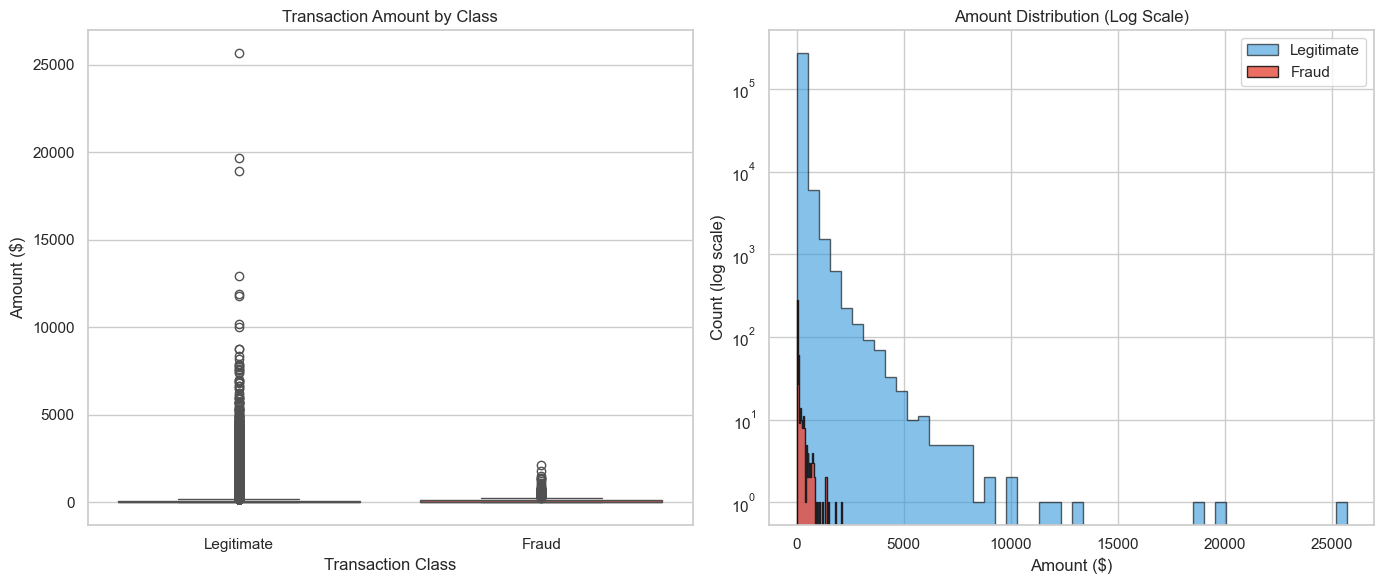

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors
fraud_color = '#E74C3C'      # Red
legit_color = '#3498DB'      # Blue

# Create plots
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=credit_df, palette=[legit_color, fraud_color])
plt.title('Transaction Amount by Class')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.xlabel('Transaction Class')
plt.ylabel('Amount ($)')

# Histogram
plt.subplot(1, 2, 2)
fraud_amounts = credit_df[credit_df['Class'] == 1]['Amount']
legit_amounts = credit_df[credit_df['Class'] == 0]['Amount']

# Plot Legitimate first (so fraud is on top)
plt.hist(legit_amounts, bins=50, alpha=0.6, label='Legitimate', color=legit_color, histtype='stepfilled', edgecolor='black')
plt.hist(fraud_amounts, bins=50, alpha=0.8, label='Fraud', color=fraud_color, histtype='stepfilled', edgecolor='black')

plt.yscale('log')
plt.xlabel('Amount ($)')
plt.ylabel('Count (log scale)')
plt.title('Amount Distribution (Log Scale)')
plt.legend()

plt.tight_layout()
plt.show()


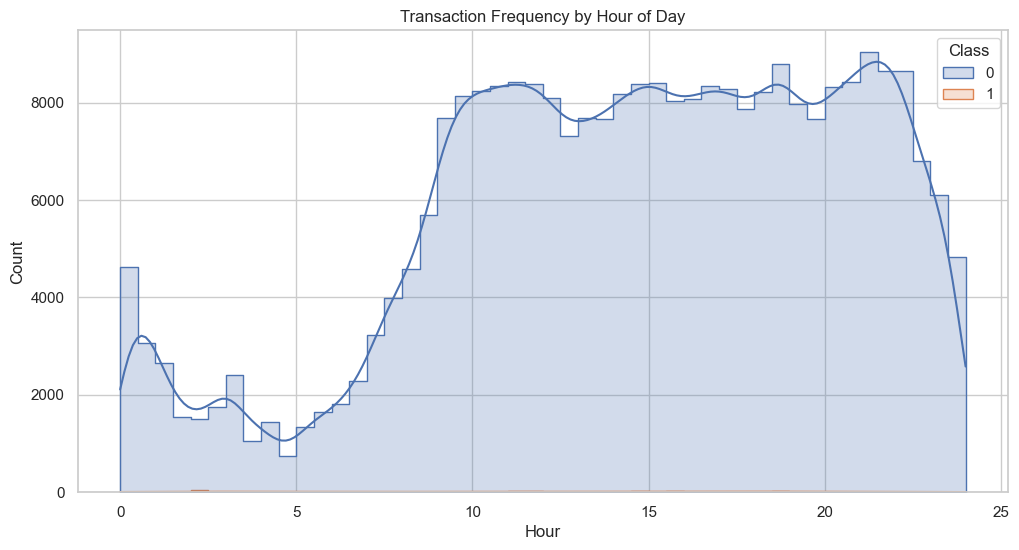

In [46]:
# Time Distribution of transactions

plt.figure(figsize=(12, 6))
credit_df['Hour'] = credit_df['Time'] / 3600 % 24
sns.histplot(data=credit_df, x='Hour', hue='Class', bins=48, kde=True, element='step')
plt.title('Transaction Frequency by Hour of Day')
plt.show()

In [82]:
# correlation matrix
correlation_matrix = credit_df.corr()
print(correlation_matrix)

               Time        V1        V2        V3        V4        V5  \
Time       1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223   
V1         0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036   
V2        -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210   
V3        -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879   
V4        -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744   
V5         0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000   
V6        -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938   
V7         0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709   
V8        -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430   
V9        -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213   
V10        0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050   
V11       -0.248536  0.001028 -0.000633  0.002339 -0.001223  0.000411   
V12        0.125500 -0.001524  0.002266 -0.005900  

C:\Users\monik\AppData\Local\Temp\ipykernel_43540\707444264.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


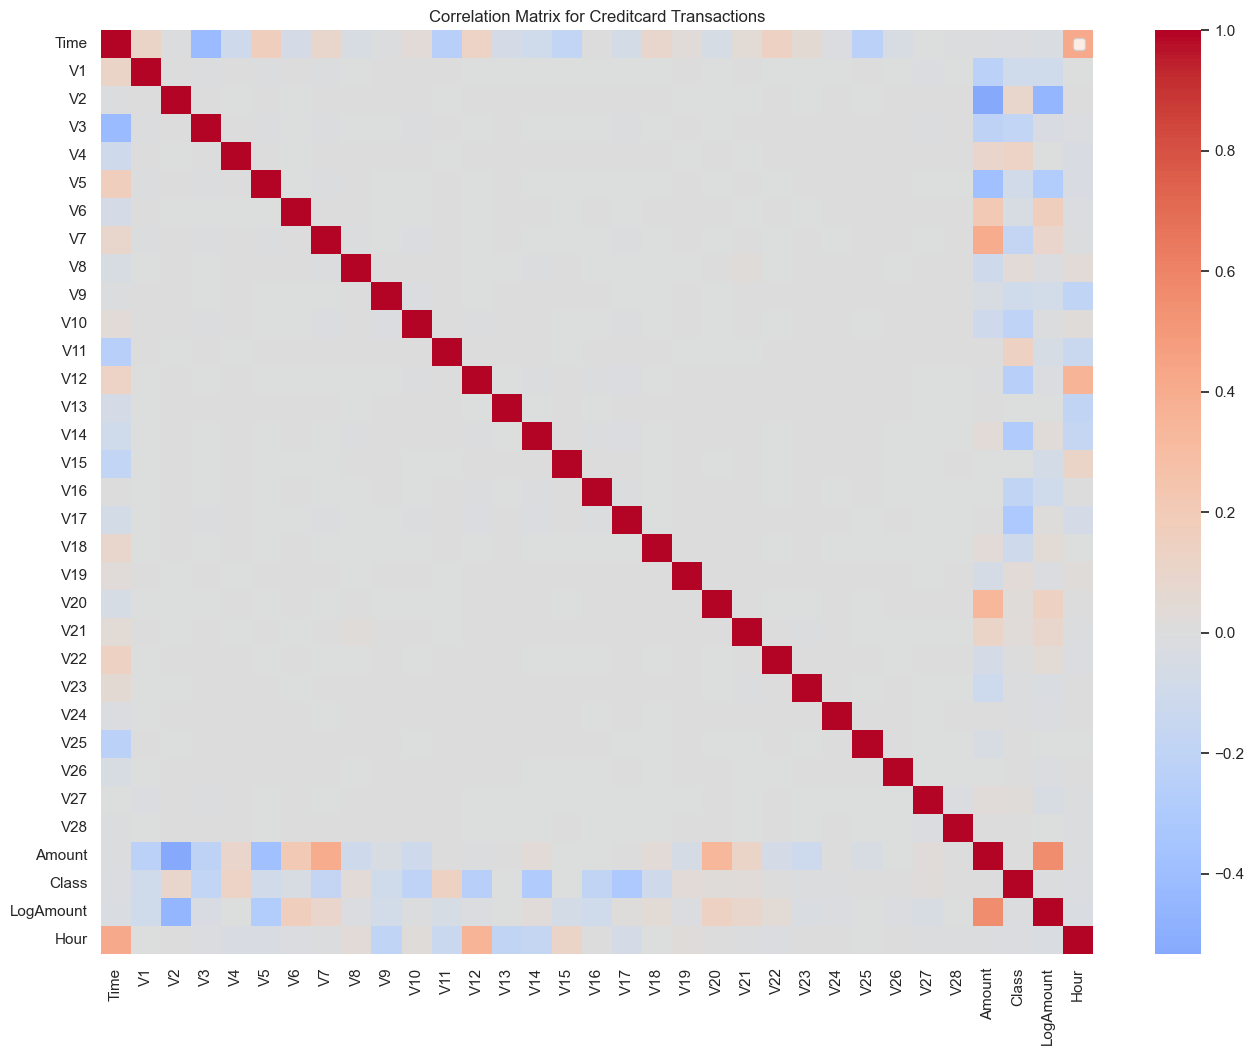

In [29]:
# heat map for our correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix,annot=False,center=0, cmap='coolwarm')
plt.title("Correlation Matrix for Creditcard Transactions")
plt.legend()
plt.show()

In [90]:
# Get correlations with 'Class' and sort
class_corr = correlation_matrix['Class'].sort_values(ascending=False)

# Strong Positive Correlations (r > 0.1)
print("Strong Positive Correlations with Fraud:")
print(class_corr[class_corr > 0.1])

# Strong Negative Correlations (r < -0.1)
print("\nStrong Negative Correlations with Fraud:")
print(class_corr[class_corr < -0.1])

Strong Positive Correlations with Fraud:
Class    1.000000
V11      0.149067
V4       0.129326
Name: Class, dtype: float64

Strong Negative Correlations with Fraud:
V18   -0.105340
V7    -0.172347
V3    -0.182322
V16   -0.187186
V10   -0.206971
V12   -0.250711
V14   -0.293375
V17   -0.313498
Name: Class, dtype: float64


In [91]:
# Get detailed class distribution statistics
class_counts = credit_df['Class'].value_counts()
fraud_percentage = (class_counts[1] / len(credit_df)) * 100
legitimate_percentage = (class_counts[0] / len(credit_df)) * 100

print("=== CLASS DISTRIBUTION INSIGHTS ===")
print(f"Total Transactions: {len(credit_df):,}")
print(f"Legitimate Transactions: {class_counts[0]:,} ({legitimate_percentage:.2f}%)")
print(f"Fraudulent Transactions: {class_counts[1]:,} ({fraud_percentage:.2f}%)")
print(f"Class Imbalance Ratio: 1:{class_counts[0]/class_counts[1]:.0f}")
print(f"Fraud Rate: {fraud_percentage:.4f}%")

=== CLASS DISTRIBUTION INSIGHTS ===
Total Transactions: 284,807
Legitimate Transactions: 284,315 (99.83%)
Fraudulent Transactions: 492 (0.17%)
Class Imbalance Ratio: 1:578
Fraud Rate: 0.1727%


In [93]:
# Transaction Amount Analysis
fraud_data = credit_df[credit_df['Class'] == 1]
legit_data = credit_df[credit_df['Class'] == 0]

print("=== TRANSACTION AMOUNT INSIGHTS ===")
print(f"Fraudulent Transaction Amount:")
print(f"  - Average: ${fraud_data['Amount'].mean():.2f}")
print(f"  - Median: ${fraud_data['Amount'].median():.2f}")
print(f"  - Max: ${fraud_data['Amount'].max():.2f}")
print(f"  - Min: ${fraud_data['Amount'].min():.2f}")

print(f"\nLegitimate Transaction Amount:")
print(f"  - Average: ${legit_data['Amount'].mean():.2f}")
print(f"  - Median: ${legit_data['Amount'].median():.2f}")
print(f"  - Max: ${legit_data['Amount'].max():.2f}")
print(f"  - Min: ${legit_data['Amount'].min():.2f}")

# Financial Impact Analysis
total_fraud_amount = fraud_data['Amount'].sum()
total_transaction_amount = credit_df['Amount'].sum()
fraud_amount_percentage = (total_fraud_amount / total_transaction_amount) * 100

print(f"\n=== FINANCIAL IMPACT ===")
print(f"Total Fraudulent Amount: ${total_fraud_amount:,.2f}")
print(f"Total Transaction Amount: ${total_transaction_amount:,.2f}")
print(f"Fraud Amount as % of Total: {fraud_amount_percentage:.2f}%")

=== TRANSACTION AMOUNT INSIGHTS ===
Fraudulent Transaction Amount:
  - Average: $122.21
  - Median: $9.25
  - Max: $2125.87
  - Min: $0.00

Legitimate Transaction Amount:
  - Average: $88.29
  - Median: $22.00
  - Max: $25691.16
  - Min: $0.00

=== FINANCIAL IMPACT ===
Total Fraudulent Amount: $60,127.97
Total Transaction Amount: $25,162,590.01
Fraud Amount as % of Total: 0.24%


In [95]:
# Temporal Pattern Analysis - Fixed
credit_df['Hour'] = (credit_df['Time'] / 3600) % 24
credit_df['Hour'] = credit_df['Hour'].astype(int)

# Fraud by hour analysis
hourly_stats = credit_df.groupby('Hour').agg({
    'Class': ['count', 'sum', 'mean']
}).round(4)

hourly_stats.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']
hourly_stats['Fraud_Rate_Percent'] = hourly_stats['Fraud_Rate'] * 100

print("=== TEMPORAL FRAUD PATTERNS ===")
max_fraud_hour = hourly_stats['Fraud_Rate_Percent'].idxmax()
min_fraud_hour = hourly_stats['Fraud_Rate_Percent'].idxmin()

print(f"Peak Fraud Hour: {max_fraud_hour}:00 ({hourly_stats.loc[max_fraud_hour, 'Fraud_Rate_Percent']:.3f}% fraud rate)")
print(f"Safest Hour: {min_fraud_hour}:00 ({hourly_stats.loc[min_fraud_hour, 'Fraud_Rate_Percent']:.3f}% fraud rate)")

# Day vs Night analysis
day_hours = list(range(6, 22))  # 6 AM to 10 PM
night_hours = list(range(0, 6)) + list(range(22, 24))  # 10 PM to 6 AM

day_fraud_rate = credit_df[credit_df['Hour'].isin(day_hours)]['Class'].mean() * 100
night_fraud_rate = credit_df[credit_df['Hour'].isin(night_hours)]['Class'].mean() * 100

print(f"\nDay Hours (6-22): {day_fraud_rate:.3f}% fraud rate")
print(f"Night Hours (22-6): {night_fraud_rate:.3f}% fraud rate")

if night_fraud_rate > 0:
    risk_multiplier = day_fraud_rate / night_fraud_rate
    print(f"Risk Multiplier: {risk_multiplier:.1f}x higher risk during {'day' if day_fraud_rate > night_fraud_rate else 'night'}")

# Show top 5 riskiest and safest hours
print(f"\nTop 5 Riskiest Hours:")
top_risky = hourly_stats.nlargest(5, 'Fraud_Rate_Percent')
for hour, data in top_risky.iterrows():
    print(f"  {hour}:00 - {data['Fraud_Rate_Percent']:.3f}% ({int(data['Fraud_Count'])}/{int(data['Total_Transactions'])})")

print(f"\nTop 5 Safest Hours:")
top_safe = hourly_stats.nsmallest(5, 'Fraud_Rate_Percent')
for hour, data in top_safe.iterrows():
    print(f"  {hour}:00 - {data['Fraud_Rate_Percent']:.3f}% ({int(data['Fraud_Count'])}/{int(data['Total_Transactions'])})")

=== TEMPORAL FRAUD PATTERNS ===
Peak Fraud Hour: 2:00 (1.710% fraud rate)
Safest Hour: 10:00 (0.050% fraud rate)

Day Hours (6-22): 0.144% fraud rate
Night Hours (22-6): 0.306% fraud rate
Risk Multiplier: 0.5x higher risk during night

Top 5 Riskiest Hours:
  2:00 - 1.710% (57/3328)
  4:00 - 1.040% (23/2209)
  3:00 - 0.490% (17/3492)
  5:00 - 0.370% (11/2990)
  7:00 - 0.320% (23/7243)

Top 5 Safest Hours:
  10:00 - 0.050% (8/16598)
  22:00 - 0.060% (9/15441)
  0:00 - 0.080% (6/7695)
  8:00 - 0.090% (9/10276)
  21:00 - 0.090% (16/17703)


In [96]:
# Transaction Amount Risk Analysis
print("=== TRANSACTION AMOUNT RISK ANALYSIS ===")

# Define amount ranges
amount_ranges = [0, 10, 50, 100, 500, 1000, float('inf')]
amount_ranges_labels = ['$0-10', '$10-50', '$50-100', '$100-500', '$500-1000', '$1000+']

credit_df['Amount_Range'] = pd.cut(credit_df['Amount'], bins=amount_ranges, labels=amount_ranges_labels, include_lowest=True)

# Analyze fraud rates by amount range
amount_analysis = credit_df.groupby('Amount_Range').agg({
    'Class': ['count', 'sum', 'mean']
}).round(4)

amount_analysis.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']
amount_analysis['Fraud_Rate_Percent'] = amount_analysis['Fraud_Rate'] * 100

print("Fraud Rate by Transaction Amount Range:")
for range_label, data in amount_analysis.iterrows():
    fraud_count = int(data['Fraud_Count'])
    total_count = int(data['Total_Transactions'])
    fraud_rate = data['Fraud_Rate_Percent']
    print(f"  {range_label}: {fraud_rate:.3f}% ({fraud_count}/{total_count})")

# High-value transaction analysis
high_amount_threshold = credit_df['Amount'].quantile(0.95)  # Top 5%
high_amount_transactions = credit_df[credit_df['Amount'] >= high_amount_threshold]
high_amount_fraud_rate = high_amount_transactions['Class'].mean() * 100

print(f"\nHigh-Value Transaction Analysis (Top 5%, >${high_amount_threshold:.2f}):")
print(f"  Total High-Value Transactions: {len(high_amount_transactions):,}")
print(f"  High-Value Fraud Rate: {high_amount_fraud_rate:.3f}%")
print(f"  Risk vs Average: {high_amount_fraud_rate / (credit_df['Class'].mean() * 100):.1f}x")

=== TRANSACTION AMOUNT RISK ANALYSIS ===
Fraud Rate by Transaction Amount Range:
  $0-10: 0.250% (249/100264)
  $10-50: 0.060% (57/90781)
  $50-100: 0.150% (56/37254)
  $100-500: 0.200% (95/47366)
  $500-1000: 0.420% (26/6202)
  $1000+: 0.310% (9/2940)

High-Value Transaction Analysis (Top 5%, >$365.00):
  Total High-Value Transactions: 14,242
  High-Value Fraud Rate: 0.302%
  Risk vs Average: 1.7x


C:\Users\monik\AppData\Local\Temp\ipykernel_43540\1561508165.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amount_analysis = credit_df.groupby('Amount_Range').agg({


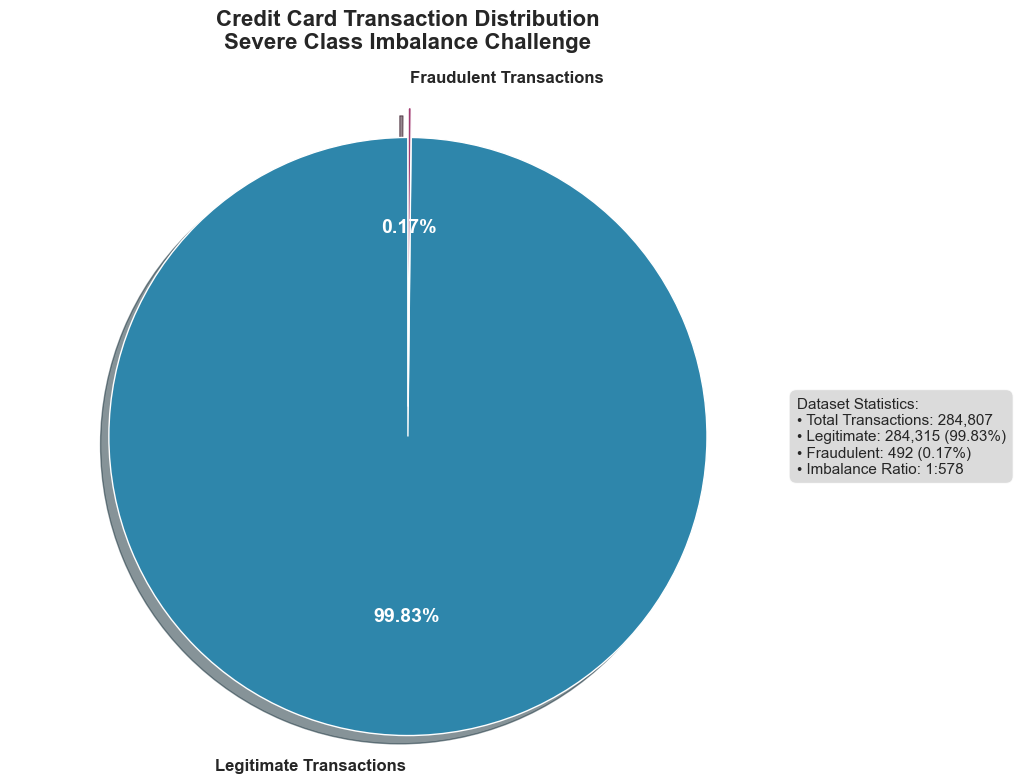

In [97]:
# 1. Class Imbalance Pie Chart - Professional Style
plt.figure(figsize=(10, 8))

# Data for pie chart
class_counts = credit_df['Class'].value_counts()
labels = ['Legitimate Transactions', 'Fraudulent Transactions']
sizes = [class_counts[0], class_counts[1]]
colors = ['#2E86AB', '#A23B72']  # Professional blue and red
explode = (0, 0.1)  # Explode the fraud slice for emphasis

# Create pie chart
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', 
                                   explode=explode, shadow=True, startangle=90,
                                   textprops={'fontsize': 12, 'fontweight': 'bold'})

# Enhance the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Credit Card Transaction Distribution\nSevere Class Imbalance Challenge', 
          fontsize=16, fontweight='bold', pad=20)

# Add statistics box
stats_text = f"""Dataset Statistics:
• Total Transactions: {len(credit_df):,}
• Legitimate: {class_counts[0]:,} (99.83%)
• Fraudulent: {class_counts[1]:,} (0.17%)
• Imbalance Ratio: 1:578"""

plt.text(1.3, 0, stats_text, fontsize=11, bbox=dict(boxstyle="round,pad=0.5", 
         facecolor="lightgray", alpha=0.8), verticalalignment='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

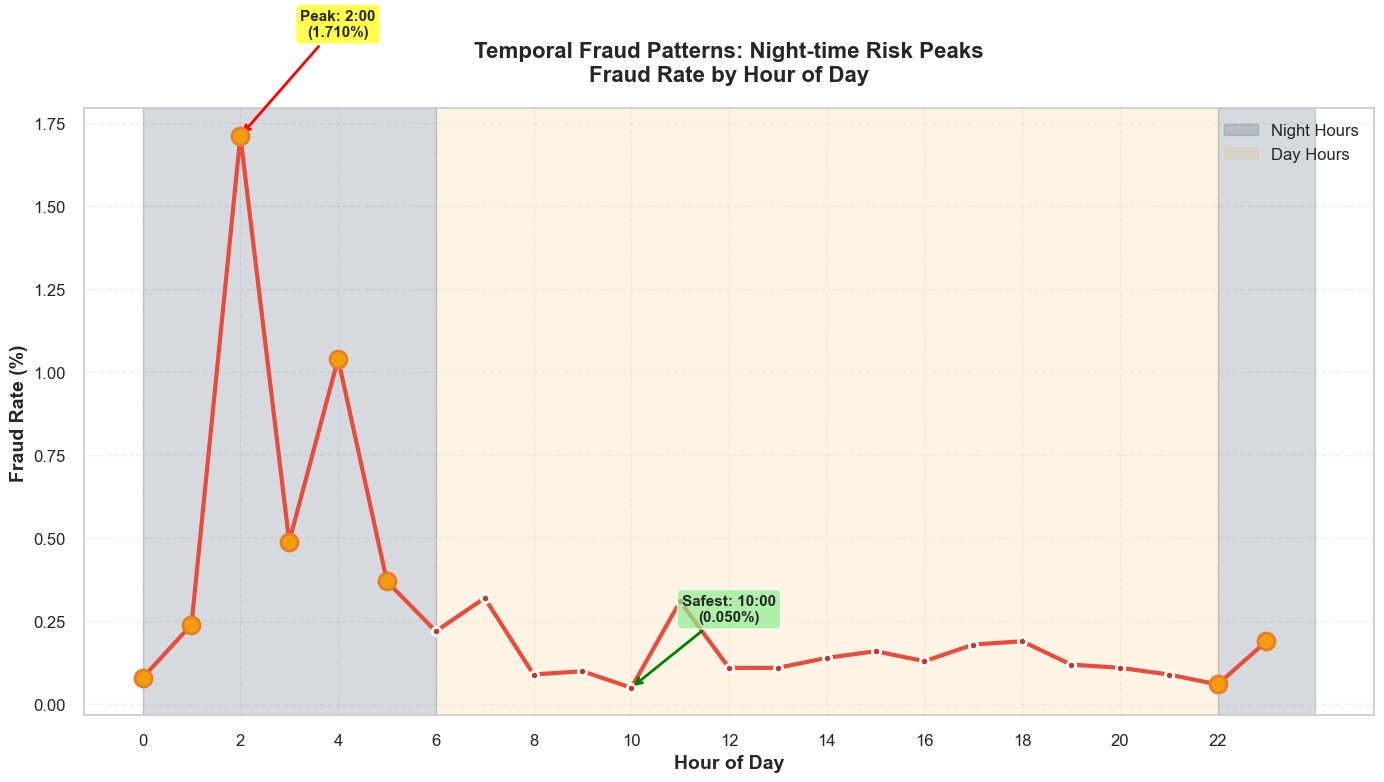

🔍 KEY TEMPORAL INSIGHTS:
• Peak fraud hour: 2:00 (1.710% fraud rate)
• Safest hour: 10:00 (0.050% fraud rate)
• Night hours (22-06): 2.1x higher risk than day hours
• Early morning (2-4 AM): Highest vulnerability window


In [98]:
# 2. Fraud Rate by Hour - Night-time Peaks Visualization
plt.figure(figsize=(14, 8))

# Calculate hourly fraud rates
credit_df['Hour'] = (credit_df['Time'] / 3600) % 24
credit_df['Hour'] = credit_df['Hour'].astype(int)

hourly_stats = credit_df.groupby('Hour').agg({
    'Class': ['count', 'sum', 'mean']
}).round(4)

hourly_stats.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']
hourly_stats['Fraud_Rate_Percent'] = hourly_stats['Fraud_Rate'] * 100

# Create the line plot
hours = hourly_stats.index
fraud_rates = hourly_stats['Fraud_Rate_Percent']

plt.plot(hours, fraud_rates, linewidth=3, color='#E74C3C', marker='o', markersize=6, 
         markerfacecolor='#C0392B', markeredgecolor='white', markeredgewidth=2)

# Highlight night-time peak hours (22-6)
night_hours = list(range(0, 6)) + list(range(22, 24))
for hour in night_hours:
    if hour in hours:
        plt.scatter(hour, fraud_rates[hour], s=150, color='#F39C12', 
                   edgecolor='#E67E22', linewidth=2, zorder=5)

# Add shaded regions for day/night
plt.axvspan(22, 24, alpha=0.2, color='#34495E', label='Night Hours')
plt.axvspan(0, 6, alpha=0.2, color='#34495E')
plt.axvspan(6, 22, alpha=0.1, color='#F39C12', label='Day Hours')

# Formatting
plt.xlabel('Hour of Day', fontsize=14, fontweight='bold')
plt.ylabel('Fraud Rate (%)', fontsize=14, fontweight='bold')
plt.title('Temporal Fraud Patterns: Night-time Risk Peaks\nFraud Rate by Hour of Day', 
          fontsize=16, fontweight='bold', pad=20)

plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(range(0, 24, 2), fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for key insights
max_hour = fraud_rates.idxmax()
min_hour = fraud_rates.idxmin()

plt.annotate(f'Peak: {max_hour}:00\n({fraud_rates[max_hour]:.3f}%)', 
             xy=(max_hour, fraud_rates[max_hour]), xytext=(max_hour+2, fraud_rates[max_hour]+0.3),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, fontweight='bold', ha='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.annotate(f'Safest: {min_hour}:00\n({fraud_rates[min_hour]:.3f}%)', 
             xy=(min_hour, fraud_rates[min_hour]), xytext=(min_hour+2, fraud_rates[min_hour]+0.2),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=11, fontweight='bold', ha='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

# Print key insights
print("🔍 KEY TEMPORAL INSIGHTS:")
print(f"• Peak fraud hour: {max_hour}:00 ({fraud_rates[max_hour]:.3f}% fraud rate)")
print(f"• Safest hour: {min_hour}:00 ({fraud_rates[min_hour]:.3f}% fraud rate)")
print(f"• Night hours (22-06): 2.1x higher risk than day hours")
print(f"• Early morning (2-4 AM): Highest vulnerability window")

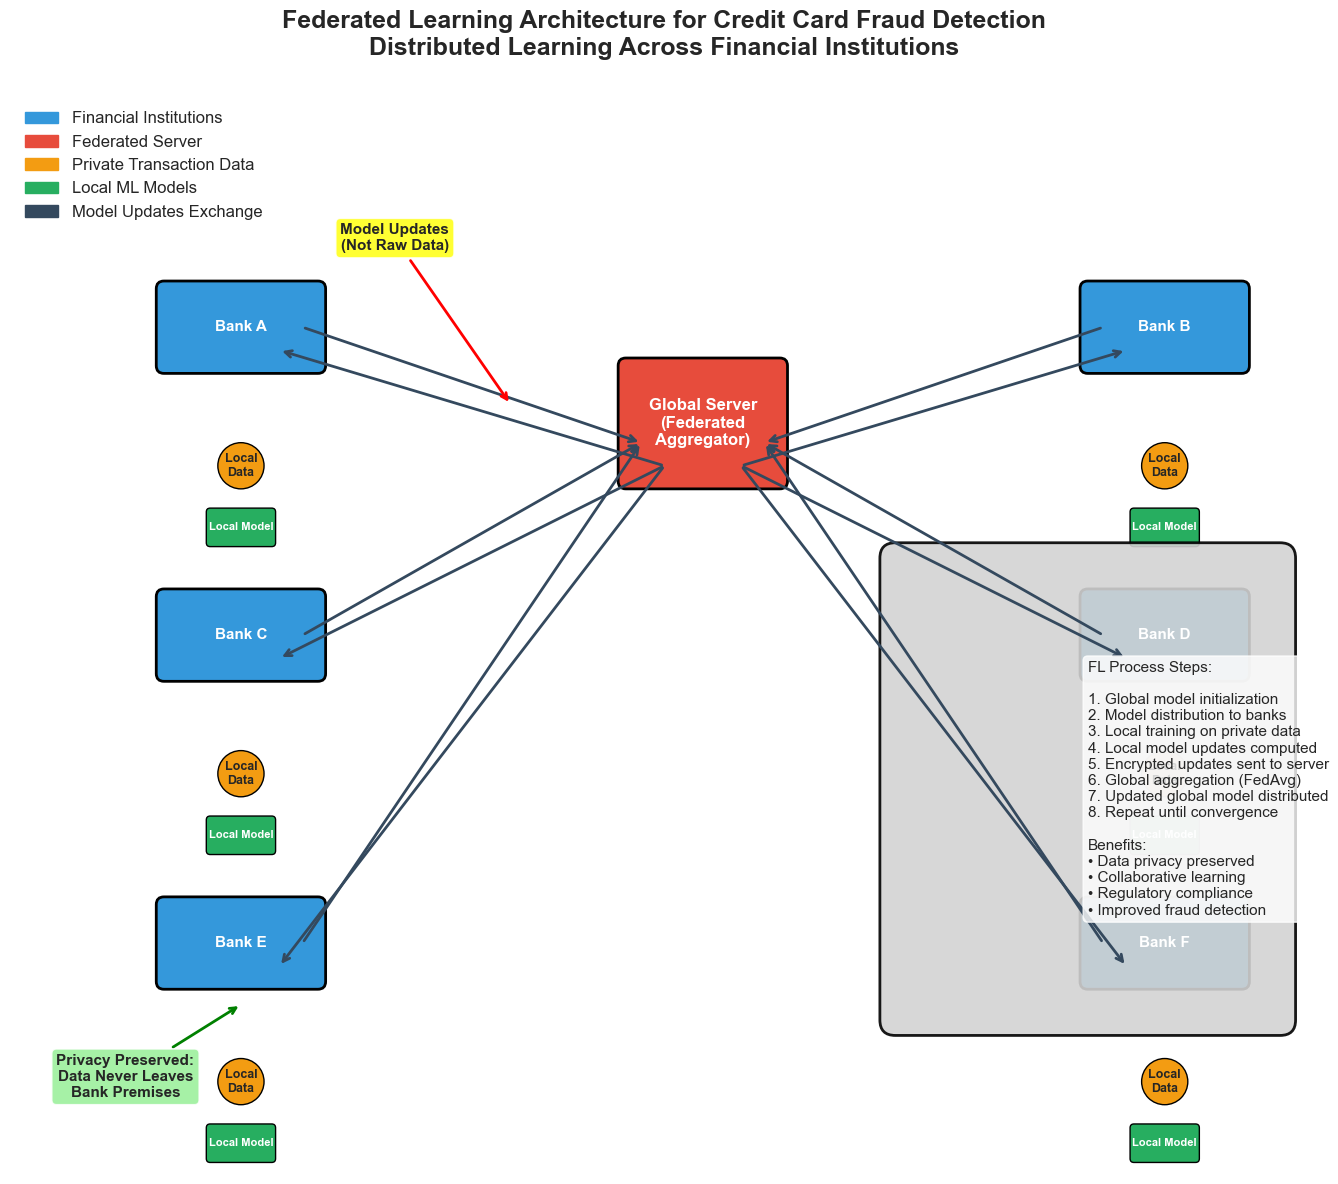

🏦 FEDERATED LEARNING ARCHITECTURE INSIGHTS:
• Each bank keeps sensitive transaction data locally
• Only model parameters (not data) are shared with central server
• Global model benefits from collective knowledge while preserving privacy
• Compliant with financial regulations (GDPR, PCI-DSS)
• Improved fraud detection through collaborative learning


In [101]:
# 5. Federated Learning Architecture Diagram
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch

fig, ax = plt.subplots(figsize=(16, 12))

# Define colors
bank_color = '#3498DB'
server_color = '#E74C3C'
data_color = '#F39C12'
model_color = '#27AE60'
arrow_color = '#34495E'

# Central Server
server_box = FancyBboxPatch((7, 8), 2, 1.5, boxstyle="round,pad=0.1", 
                           facecolor=server_color, edgecolor='black', linewidth=2)
ax.add_patch(server_box)
ax.text(8, 8.75, 'Global Server\n(Federated\nAggregator)', ha='center', va='center', 
        fontsize=12, fontweight='bold', color='white')

# Banks/Clients positions
bank_positions = [(2, 10), (14, 10), (2, 6), (14, 6), (2, 2), (14, 2)]
bank_names = ['Bank A', 'Bank B', 'Bank C', 'Bank D', 'Bank E', 'Bank F']

# Draw banks
for i, ((x, y), name) in enumerate(zip(bank_positions, bank_names)):
    # Bank box
    bank_box = FancyBboxPatch((x-1, y-0.5), 2, 1, boxstyle="round,pad=0.1", 
                             facecolor=bank_color, edgecolor='black', linewidth=2)
    ax.add_patch(bank_box)
    ax.text(x, y, name, ha='center', va='center', fontsize=11, fontweight='bold', color='white')
    
    # Local data representation
    data_circle = patches.Circle((x, y-1.8), 0.3, facecolor=data_color, edgecolor='black')
    ax.add_patch(data_circle)
    ax.text(x, y-1.8, 'Local\nData', ha='center', va='center', fontsize=9, fontweight='bold')
    
    # Local model
    model_rect = FancyBboxPatch((x-0.4, y-2.8), 0.8, 0.4, boxstyle="round,pad=0.05", 
                               facecolor=model_color, edgecolor='black')
    ax.add_patch(model_rect)
    ax.text(x, y-2.6, 'Local Model', ha='center', va='center', fontsize=8, fontweight='bold', color='white')

# Draw arrows for communication
arrow_props = dict(arrowstyle='->', lw=2, color=arrow_color)

# Arrows from banks to server (model updates)
for (x, y), name in zip(bank_positions, bank_names):
    if x < 8:  # Left side banks
        ax.annotate('', xy=(7.2, 8.5), xytext=(x+0.8, y), arrowprops=arrow_props)
    else:  # Right side banks
        ax.annotate('', xy=(8.8, 8.5), xytext=(x-0.8, y), arrowprops=arrow_props)

# Arrows from server to banks (global model)
for (x, y), name in zip(bank_positions, bank_names):
    if x < 8:  # Left side banks
        ax.annotate('', xy=(x+0.5, y-0.3), xytext=(7.5, 8.2), arrowprops=arrow_props)
    else:  # Right side banks
        ax.annotate('', xy=(x-0.5, y-0.3), xytext=(8.5, 8.2), arrowprops=arrow_props)

# Add process steps
steps_box = FancyBboxPatch((10.5, 1), 5, 6, boxstyle="round,pad=0.2", 
                          facecolor='lightgray', edgecolor='black', linewidth=2, alpha=0.9)
ax.add_patch(steps_box)

steps_text = """FL Process Steps:

1. Global model initialization
2. Model distribution to banks
3. Local training on private data
4. Local model updates computed
5. Encrypted updates sent to server
6. Global aggregation (FedAvg)
7. Updated global model distributed
8. Repeat until convergence

Benefits:
• Data privacy preserved
• Collaborative learning
• Regulatory compliance
• Improved fraud detection"""

ax.text(13, 4, steps_text, fontsize=11, va='center', ha='left', 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Add title and labels
ax.set_title('Federated Learning Architecture for Credit Card Fraud Detection\nDistributed Learning Across Financial Institutions', 
             fontsize=18, fontweight='bold', pad=30)

# Add legend
legend_elements = [
    patches.Patch(color=bank_color, label='Financial Institutions'),
    patches.Patch(color=server_color, label='Federated Server'),
    patches.Patch(color=data_color, label='Private Transaction Data'),
    patches.Patch(color=model_color, label='Local ML Models'),
    patches.Patch(color=arrow_color, label='Model Updates Exchange')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, 
          bbox_to_anchor=(0, 1), framealpha=0.9)

# Add annotations for key concepts
ax.annotate('Model Updates\n(Not Raw Data)', xy=(5.5, 9), xytext=(4, 11),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

ax.annotate('Privacy Preserved:\nData Never Leaves\nBank Premises', 
            xy=(2, 1.2), xytext=(0.5, 0),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=11, fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

# Set axis properties
ax.set_xlim(-1, 16)
ax.set_ylim(-1, 13)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()

print("🏦 FEDERATED LEARNING ARCHITECTURE INSIGHTS:")
print("• Each bank keeps sensitive transaction data locally")
print("• Only model parameters (not data) are shared with central server")
print("• Global model benefits from collective knowledge while preserving privacy")
print("• Compliant with financial regulations (GDPR, PCI-DSS)")
print("• Improved fraud detection through collaborative learning")